In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

In [9]:
#load data
df = pd.read_csv("telecom_customer_churn_practice.csv")

In [10]:
#EDA
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST-00001,Male,0,No,No,68,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,No,Bank transfer (automatic),79.72,5414.19,No
1,CUST-00002,Female,0,No,No,54,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,35.94,1938.36,No
2,CUST-00003,Male,0,Yes,Yes,57,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),66.16,3787.83,No
3,CUST-00004,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Two year,Yes,Mailed check,81.63,1884.13,No
4,CUST-00005,Male,0,No,No,60,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),82.56,4937.16,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,3000.000000,2955.000000
mean,0.135667,35.722667,69.271947,2473.198389
std,0.342491,20.631989,21.320366,1682.622495
min,0.000000,1.000000,18.250000,15.060000
25%,0.000000,18.000000,51.427500,1086.150000
50%,0.000000,35.000000,72.630000,2169.370000
75%,0.000000,53.000000,85.542500,3675.635000
max,1.000000,71.000000,121.440000,7798.460000


we found some missing values in totalCharges.whihc is teh data for the total amount of billing of each citizen. now we must know here this data came from. we have monthly charges and tenure, so i want to see if total = monthyly & tenure

In [16]:
df_compare = pd.DataFrame({
    'calculatedtotal' : df['tenure'] * df['MonthlyCharges'],
    'TotalCharges' : df['TotalCharges']
})

In [17]:
df_compare.head(20)

,calculatedtotal,TotalCharges
0,5420.96,5414.19
1,1940.76,1938.36
2,3771.12,3787.83
3,1877.49,1884.13
4,4953.60,4937.16
5,3155.35,3161.52
6,4911.48,4904.41
7,4501.28,4496.35
8,4436.85,4435.92
9,1925.25,1919.47


Turns our it's verys similar. testing with corr just to confirm

In [25]:
print(f"Correlation: {df_compare['calculatedtotal'].corr(df_compare['TotalCharges'])}")


Correlation: 0.9999824517082241


OKay so, its very similar, so i can just  use the null column in df['TotalCharges] and replace it with df_compare['TotalCharges']

In [ ]:
#fill the zero values with nan first because fillna requires nan values
df['TotalCharges'] = df['TotalCharges'].replace(0, np.nan)
#then the nan values will be cahnge with my calculated formula
df['TotalCharges'] = df['TotalCharges'].fillna(
    df['tenure'] * df['MonthlyCharges']
)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [ ]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST-00001,Male,0,No,No,68,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,No,Bank transfer (automatic),79.72,5414.19,No
1,CUST-00002,Female,0,No,No,54,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,35.94,1938.36,No
2,CUST-00003,Male,0,Yes,Yes,57,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),66.16,3787.83,No
3,CUST-00004,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Two year,Yes,Mailed check,81.63,1884.13,No
4,CUST-00005,Male,0,No,No,60,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),82.56,4937.16,No


confirmed that null values in TotalCharges is fileld. Now data cleaning is done lets do some EDA

in EDA, i need to vizualize data to find out who is chrning, or are there sepcifc service or contrat thah lead to higher churn? because theres a lot of clumn i want to see the churn rate table


In [41]:
df.nunique()

customerID          3000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                71
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      2455
TotalCharges        2992
Churn                  2
dtype: int64

Feature engineering

usually demographics are weak signals like:
1. gender
2. seniorcitizen
3. partner
4. dependents

customer lifecycle usually are strong signals:
1. tenure
2. contract

price sensitivity usually are strong signals:
1. monthlycharges
2. totalcharges

Service adoption very important:
1. interneservice
2. onlinesecurity
3. techsupport
4. stramingTV

Billing friction strong signals:
1. paymentmethod
2. paperlessbilling


In [45]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if col != 'customerID':
        print("\n", col)
        print(pd.crosstab(df[col], df['Churn'], normalize='index'))



 gender
Churn         No       Yes
gender                    
Female  0.694538  0.305462
Male    0.719842  0.280158

 Partner
Churn          No       Yes
Partner                    
No       0.704650  0.295350
Yes      0.710115  0.289885

 Dependents
Churn             No       Yes
Dependents                    
No          0.695402  0.304598
Yes         0.734649  0.265351

 PhoneService
Churn               No       Yes
PhoneService                    
No            0.706714  0.293286
Yes           0.707398  0.292602

 MultipleLines
Churn                   No       Yes
MultipleLines                       
No                0.704559  0.295441
No phone service  0.706714  0.293286
Yes               0.712062  0.287938

 InternetService
Churn                  No       Yes
InternetService                    
DSL              0.752465  0.247535
Fiber optic      0.649502  0.350498
No               0.737852  0.262148

 OnlineSecurity
Churn                      No       Yes
OnlineSecurity       

correct me if im wrong but im looking for big percentage gaps in churn Yes. for example contract month to month with two year is very big gap. lets categorize the rest, set if gap is above equal 10% is strong, if 9-6% is moderate, if 5-3% is medium, 2% below is weak

In [63]:
import pandas as pd

results = []

categorical_cols = df.select_dtypes(include='object').columns.drop(['customerID','Churn'])

for col in categorical_cols:
    churn_table = pd.crosstab(df[col], df['Churn'], normalize='index')
    
    if 'Yes' in churn_table.columns:
        churn_rates = churn_table['Yes']
        gap = churn_rates.max() - churn_rates.min()
        
        # Categorize strength
        if gap >= 0.10:
            strength = "Strong"
        elif 0.06 <= gap < 0.10:
            strength = "Moderate"
        elif 0.03 <= gap < 0.06:
            strength = "Medium"
        else:
            strength = "Weak"
            
        results.append({
            'Feature': col,
            'Max_Churn_Rate': churn_rates.max(),
            'Min_Churn_Rate': churn_rates.min(),
            'Gap': gap,
            'Strength': strength
        })

gap_df = pd.DataFrame(results).sort_values(by='Gap', ascending=False)

gap_df


,Feature,Max_Churn_Rate,Min_Churn_Rate,Gap,Strength
12,Contract,0.481862,0.006623,0.475240,Strong
14,PaymentMethod,0.376184,0.246238,0.129946,Strong
5,InternetService,0.350498,0.247535,0.102964,Strong
9,TechSupport,0.332907,0.232772,0.100136,Strong
6,OnlineSecurity,0.323418,0.253918,0.069499,Moderate
11,StreamingMovies,0.329439,0.262148,0.067291,Moderate
10,StreamingTV,0.319264,0.262148,0.057116,Medium
8,DeviceProtection,0.309832,0.262148,0.047683,Medium
7,OnlineBackup,0.305419,0.262148,0.043270,Medium
2,Dependents,0.304598,0.265351,0.039247,Medium


numeric feature behavior use boxplot

<Axes: xlabel='Churn', ylabel='tenure'>

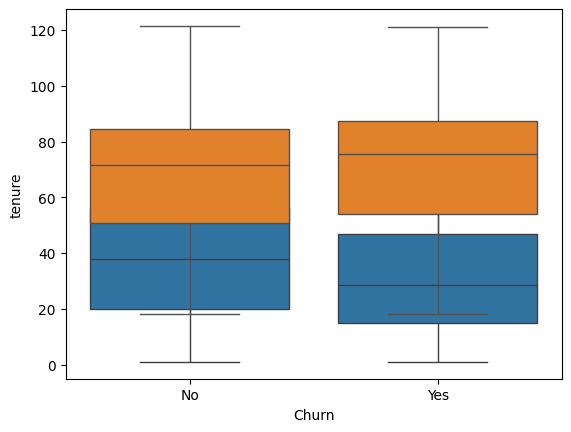

In [67]:
sns.boxplot(data=df, x='Churn', y='tenure')
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')


churn customer have lower tenure \
churn customer higher monthly charges

i want to see Tenure groups, i have to see tenures unique values

In [72]:
sorted(df['tenure'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

In [73]:
df['TenureGroup'] = pd.cut(df['tenure'],
                    bins = [0,6,12,24,60,100],
                    labels=['0-6','6-12','12-24','24-60','60-71'])

In [75]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)


In [76]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric,TenureGroup,AvgMonthlySpend
0,CUST-00001,Male,0,No,No,68,Yes,Yes,DSL,Yes,...,No,One year,No,Bank transfer (automatic),79.72,5414.19,No,0,60-71,78.466522
1,CUST-00002,Female,0,No,No,54,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,35.94,1938.36,No,0,24-60,35.242909
2,CUST-00003,Male,0,Yes,Yes,57,Yes,No,DSL,No,...,No,Month-to-month,No,Bank transfer (automatic),66.16,3787.83,No,0,24-60,65.307414
3,CUST-00004,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,Two year,Yes,Mailed check,81.63,1884.13,No,0,12-24,78.505417
4,CUST-00005,Male,0,No,No,60,Yes,Yes,DSL,No,...,Yes,Month-to-month,No,Bank transfer (automatic),82.56,4937.16,No,0,24-60,80.937049


hmm what plots?

In [77]:
pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index')

Churn,No,Yes
TenureGroup,,
0-6,0.615970,0.384030
6-12,0.651064,0.348936
12-24,0.628366,0.371634
24-60,0.737526,0.262474
60-71,0.784232,0.215768


Lets make an ML model with the strong features

In [95]:
strong_features = [
    'Contract',
    'TechSupport',
    'InternetService',
    'PaymentMethod',
    'OnlineSecurity',
    'tenure',
    'MonthlyCharges'
]

X = df[strong_features]
y = df['Churn'].map({'No':0, 'Yes':1})

encode categorical columns

In [96]:
X = pd.get_dummies(X, drop_first=True)

In [97]:
X

,tenure,MonthlyCharges,Contract_One year,Contract_Two year,TechSupport_No internet service,TechSupport_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,68,79.72,True,False,False,True,False,False,False,False,False,False,True
1,54,35.94,False,True,True,False,False,True,False,False,True,True,False
2,57,66.16,False,False,False,True,False,False,False,False,False,False,False
3,23,81.63,False,True,False,True,False,False,False,False,True,False,False
4,60,82.56,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,52,54.13,False,False,True,False,False,True,False,True,False,True,False
2996,48,85.29,True,False,False,False,True,False,True,False,False,False,True
2997,68,78.41,False,True,False,False,True,False,False,True,False,False,False
2998,44,103.68,False,False,False,True,True,False,False,False,False,False,False


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [101]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [102]:
from sklearn.metrics import classification_report, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       424
           1       0.63      0.49      0.55       176

    accuracy                           0.77       600
   macro avg       0.72      0.69      0.70       600
weighted avg       0.75      0.77      0.76       600

ROC AUC Score: 0.8400648584905661


In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


ROC AUC: 0.762053762864494
